In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-05-25 13:50:29.966814: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [7]:
df['residuals'] = (- df['UWr'] * df['rhoair']) - df['stress']
e = df['residuals']

Text(0, 0.5, 'Residuals')

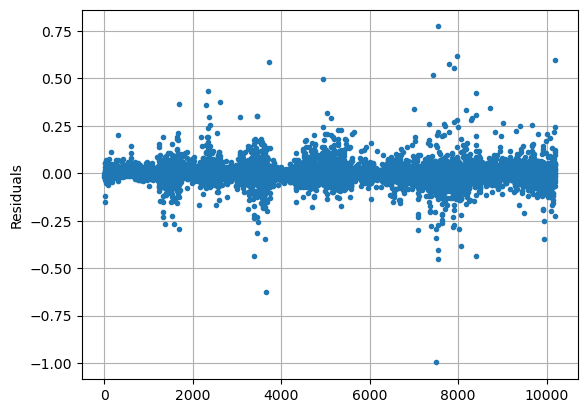

In [8]:
plt.plot(e, '.')
plt.grid()
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

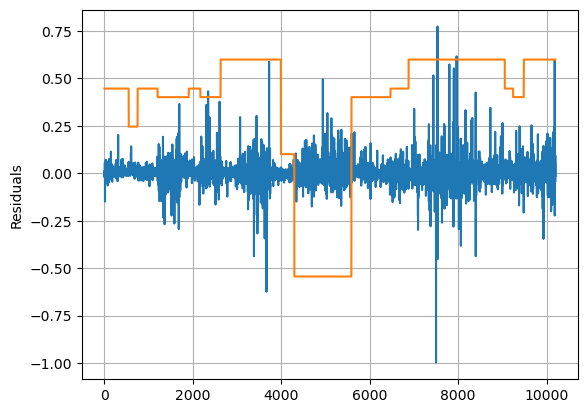

In [9]:
plt.plot(e)
plt.plot(df['lat']/100)
plt.grid()
plt.ylabel('Residuals')

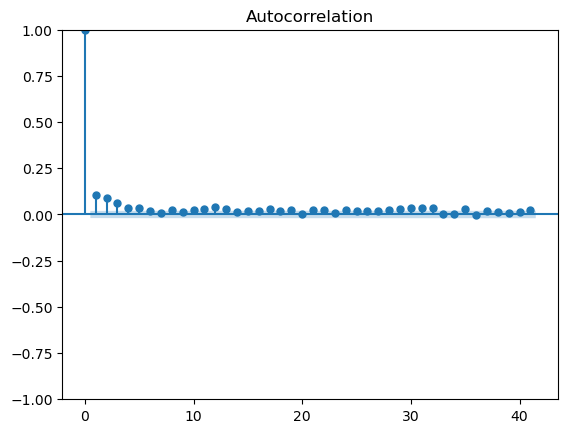

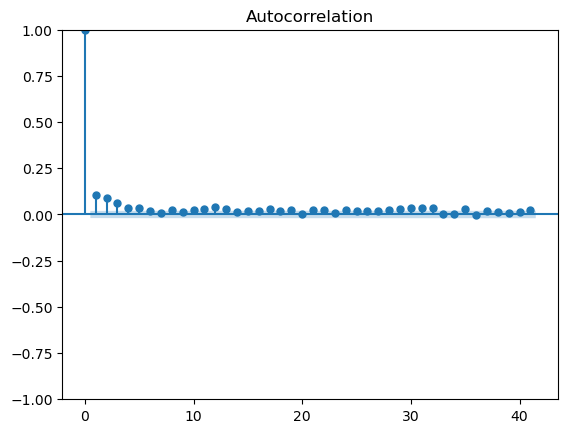

In [10]:

# import the required modules
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
 
# plot the auto correlation
plot_acf(e)

In [11]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10,residuals
8291,-0.012150,-0.032903,266.100000,2491.995719,1031.113303,1032.385986,4.375262,4.390499,93.076403,93.066660,...,99.329994,145.099991,52.219997,41.040001,52.239998,20210402T110300Z,20210402T124458.125000Z,6.045154,7.037160,0.039635
3812,0.009946,-0.040725,325.699998,2486.762542,1002.355768,1003.579007,5.421004,5.432089,90.952000,90.829780,...,60.669998,15.929999,51.360001,40.430000,51.329998,20170612T204500Z,20170612T222658.125000Z,-6.122303,-9.317768,-0.001970
2220,-0.098607,-0.048255,292.959996,2465.628629,1012.968245,1014.174503,5.485714,5.685436,62.488897,60.825029,...,101.400002,146.589996,37.619999,28.219999,37.610001,20171118T141200Z,20171118T155058.125000Z,5.725120,4.448625,0.041442
4495,0.547509,0.022966,337.584998,2482.259844,993.137445,994.339005,6.040936,6.061799,86.591240,86.278805,...,117.959999,162.399994,59.059998,47.939999,58.859997,20160129T130900Z,20160129T144758.125000Z,5.358885,-13.263199,0.030845
1173,0.085739,0.094400,357.980002,2471.653475,1017.458491,1018.669986,8.439131,8.454612,95.247900,95.275105,...,100.189995,145.770004,48.719997,37.790001,48.719997,20160916T174500Z,20160916T192358.125000Z,1.669808,-3.258454,-0.000639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,272.535001,2491.064483,1016.776770,1018.032996,3.411718,3.462474,73.038053,72.278851,...,95.549995,141.940002,63.939999,52.369999,63.719997,20210118T120300Z,20210118T134158.125000Z,6.045154,7.037160,-0.015636
9509,0.065996,-0.026629,273.849998,2476.814342,1011.035600,1012.250504,6.481914,6.540536,83.244302,82.543787,...,101.309998,146.940002,46.489998,35.770000,46.469997,20190816T122700Z,20190816T140858.125000Z,4.793102,-5.152116,-0.008123
2283,0.016743,-0.032014,288.435002,2467.407841,1014.254360,1015.478500,3.801912,4.031039,56.148297,53.812369,...,-69.070000,-113.919998,61.529999,50.469997,61.609997,20171207T151500Z,20171207T165358.125000Z,9.488249,-0.378240,-0.001118
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479,-0.045372


In [24]:
c = df['stress']
obs = - df['UWr'] * df['rhoair']

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [25]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [26]:
df.shape

(10200, 68)

In [27]:
df.shape[0]*0.8

8160.0

In [28]:
split_idx = 8160

In [29]:
df['residuals'] = (- df['UWr'] * df['rhoair']) - df['stress']
e = df['residuals']

Text(0, 0.5, 'Residuals')

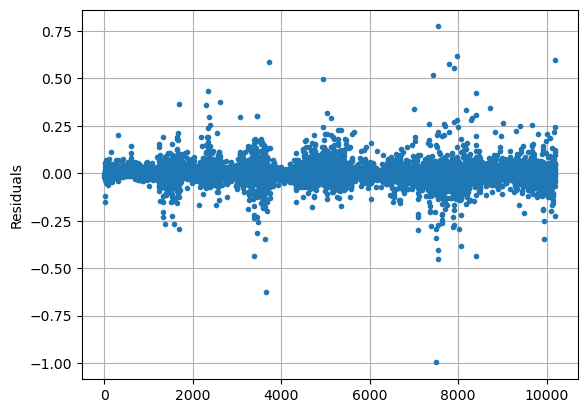

In [30]:
plt.plot(e, '.')
plt.grid()
plt.ylabel('Residuals')

# Prepare features and labels

In [31]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft', 
    'u10', 'v10',
    'lat', 'lon'
]

In [32]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10,lat,lon
8291,-21.329966,-20.314684,-20.953699,53.500000,99.329994,145.099991,52.219997,41.040001,52.239998,6.045154,7.037160,59.9337,-39.47378
3812,-20.943676,-13.976841,-16.550650,105.349998,60.669998,15.929999,51.360001,40.430000,51.329998,-6.122303,-9.317768,59.9337,-39.47378
2220,-13.540611,-10.180238,-18.316372,56.160000,101.400002,146.589996,37.619999,28.219999,37.610001,5.725120,4.448625,40.1334,-70.77850
4495,-20.408886,-14.060665,-14.675045,73.409996,117.959999,162.399994,59.059998,47.939999,58.859997,5.358885,-13.263199,-54.4041,-89.20690
1173,-18.629818,-16.368279,-17.564482,54.480000,100.189995,145.770004,48.719997,37.790001,48.719997,1.669808,-3.258454,44.6393,-124.30400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-27.140862,-23.478655,-28.449240,49.070000,95.549995,141.940002,63.939999,52.369999,63.719997,6.045154,7.037160,59.9337,-39.47378
9509,-22.741312,-14.892164,-18.181908,55.559998,101.309998,146.940002,46.489998,35.770000,46.469997,4.793102,-5.152116,59.9337,-39.47378
2283,-22.848459,-16.476969,-19.476072,-24.299999,-69.070000,-113.919998,61.529999,50.469997,61.609997,9.488249,-0.378240,40.1334,-70.77850
10196,-20.899197,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,4.111861,8.730479,59.9337,-39.47378


In [33]:
y = e

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [34]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [35]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [36]:
c_train = c[:split_idx]
c_test = c[split_idx:]

In [37]:
obs_train = obs[:split_idx]
obs_test = obs[split_idx:]

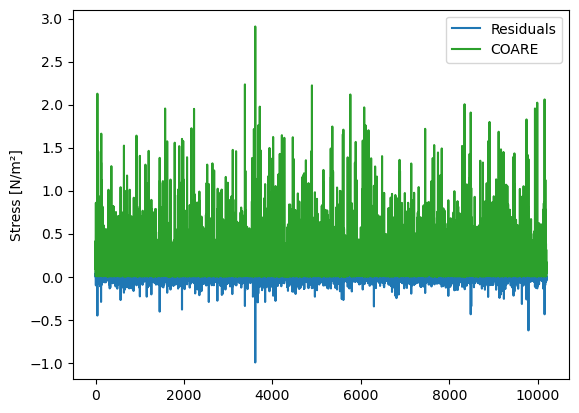

In [38]:

plt.plot(y.values, label='Residuals')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [39]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [40]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-05-25 13:51:38.675536: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-25 13:51:38.676446: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-25 13:51:38.676463: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-25 13:51:38.676491: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ppi-r8login-b2.int.met.no): /proc/driver/nvidia/version does not exist
2023-05-25 13:51:38.676842: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations,

Epoch 1/500
179/179 [==============================] - 3s 14ms/step - loss: 4629.1378 - mean_absolute_error: 56.0556 - val_loss: 1684.0194 - val_mean_absolute_error: 34.6297
Epoch 2/500
179/179 [==============================] - 0s 2ms/step - loss: 1946.3687 - mean_absolute_error: 32.2326 - val_loss: 886.4040 - val_mean_absolute_error: 24.8321
Epoch 3/500
179/179 [==============================] - 0s 1ms/step - loss: 1057.1745 - mean_absolute_error: 22.5801 - val_loss: 458.2987 - val_mean_absolute_error: 17.6969
Epoch 4/500
179/179 [==============================] - 0s 2ms/step - loss: 736.5743 - mean_absolute_error: 16.3087 - val_loss: 217.3909 - val_mean_absolute_error: 12.0300
Epoch 5/500
179/179 [==============================] - 0s 2ms/step - loss: 581.5987 - mean_absolute_error: 11.0650 - val_loss: 96.7119 - val_mean_absolute_error: 7.8616
Epoch 6/500
179/179 [==============================] - 0s 2ms/step - loss: 515.7405 - mean_absolute_error: 7.5065 - val_loss: 42.1142 - val_me

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
np.mean(y_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

In [ ]:
obs_test.values.shape

In [ ]:
y_test_pred[:, 0].shape

In [ ]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

In [ ]:
rmse(obs_test.values, c_test)

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

In [ ]:
np.corrcoef(obs_test.values, c_test)

# Other experiments

In [46]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [47]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [48]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 0.5955 - mean_absolute_error: 0.6347 - val_loss: 0.4018 - val_mean_absolute_error: 0.5448
Epoch 2/500
179/179 [==============================] - 0s 724us/step - loss: 0.0583 - mean_absolute_error: 0.1919 - val_loss: 0.0689 - val_mean_absolute_error: 0.2120
Epoch 3/500
179/179 [==============================] - 0s 718us/step - loss: 0.0291 - mean_absolute_error: 0.1335 - val_loss: 0.0294 - val_mean_absolute_error: 0.1363
Epoch 4/500
179/179 [==============================] - 0s 708us/step - loss: 0.0193 - mean_absolute_error: 0.1038 - val_loss: 0.0178 - val_mean_absolute_error: 0.1044
Epoch 5/500
179/179 [==============================] - 0s 700us/step - loss: 0.0133 - mean_absolute_error: 0.0860 - val_loss: 0.0121 - val_mean_absolute_error: 0.0841
Epoch 6/500
179/179 [==============================] - 0s 714us/step - loss: 0.0124 - mean_absolute_error: 0.0791 - val_loss: 0.0100 - val_mean_absolute_error: 0.0754


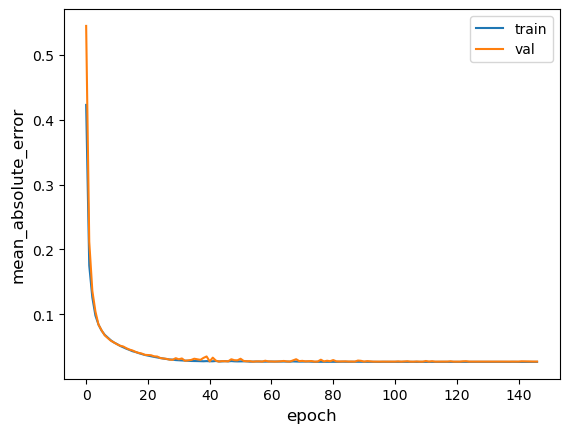

64/64 [==============================] - 0s 421us/step - loss: 0.0026 - mean_absolute_error: 0.0276
Test accuracy 0.027629101648926735
Test loss 0.00262247072532773


In [49]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [50]:
y_test_pred = multi_dense_model.predict(x_test)

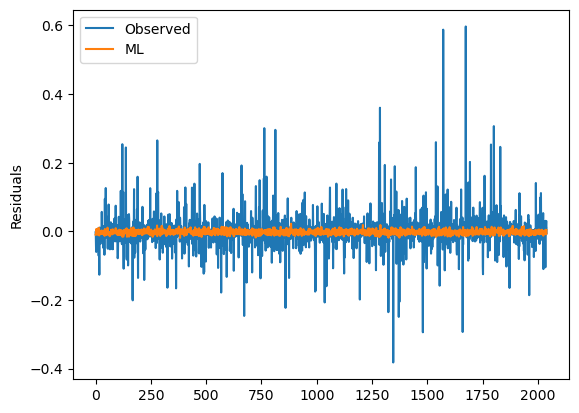

In [51]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

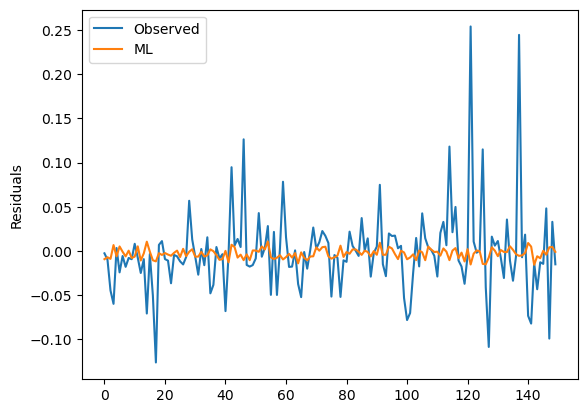

In [52]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

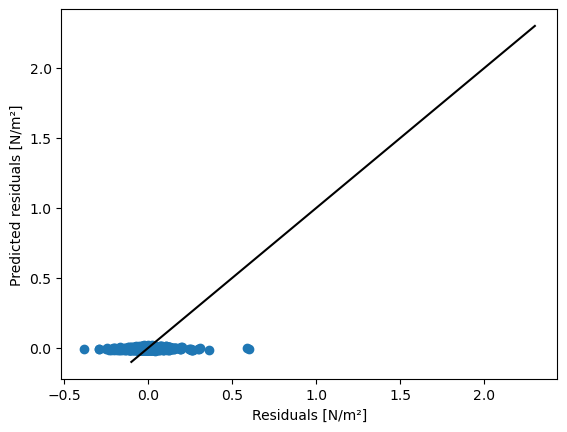

In [53]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

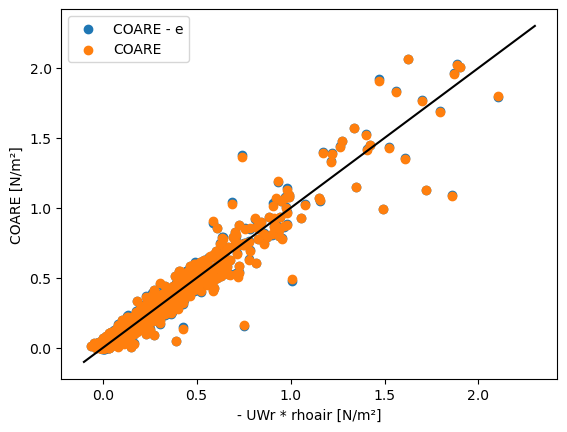

In [54]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [55]:
rmse(y_test.values, y_test_pred)

0.05167622631949103

In [56]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.05688346555561701

In [57]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [58]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.07810644],
       [0.07810644, 1.        ]])

In [59]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97339997],
       [0.97339997, 1.        ]])

In [60]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [61]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [62]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [63]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.1068 - mean_absolute_error: 0.8313 - val_loss: 0.2241 - val_mean_absolute_error: 0.3784
Epoch 2/500
179/179 [==============================] - 0s 837us/step - loss: 0.3474 - mean_absolute_error: 0.4577 - val_loss: 0.0823 - val_mean_absolute_error: 0.2286
Epoch 3/500
179/179 [==============================] - 0s 814us/step - loss: 0.2008 - mean_absolute_error: 0.3321 - val_loss: 0.0880 - val_mean_absolute_error: 0.2277
Epoch 4/500
179/179 [==============================] - 0s 812us/step - loss: 0.1388 - mean_absolute_error: 0.2669 - val_loss: 0.0686 - val_mean_absolute_error: 0.1903
Epoch 5/500
179/179 [==============================] - 0s 811us/step - loss: 0.0922 - mean_absolute_error: 0.2191 - val_loss: 0.0563 - val_mean_absolute_error: 0.1422
Epoch 6/500
179/179 [==============================] - 0s 832us/step - loss: 0.0684 - mean_absolute_error: 0.1833 - val_loss: 0.0562 - val_mean_absolute_error: 0.1347


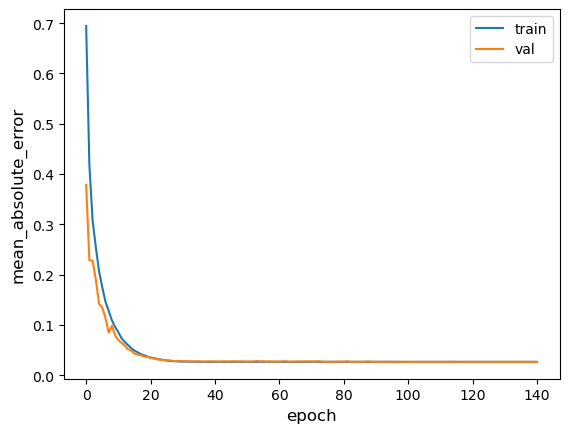

64/64 [==============================] - 0s 422us/step - loss: 0.0026 - mean_absolute_error: 0.0277
Test accuracy 0.027660660445690155
Test loss 0.0026409500278532505


In [64]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [65]:
y_test_pred = multi_dense_model.predict(x_test)

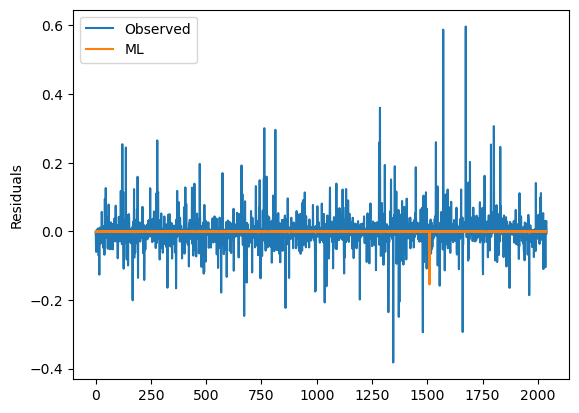

In [66]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

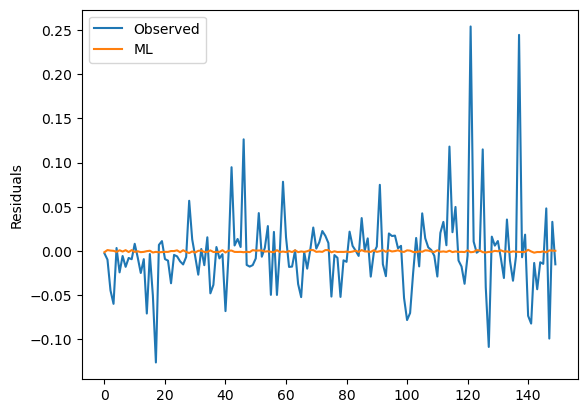

In [67]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

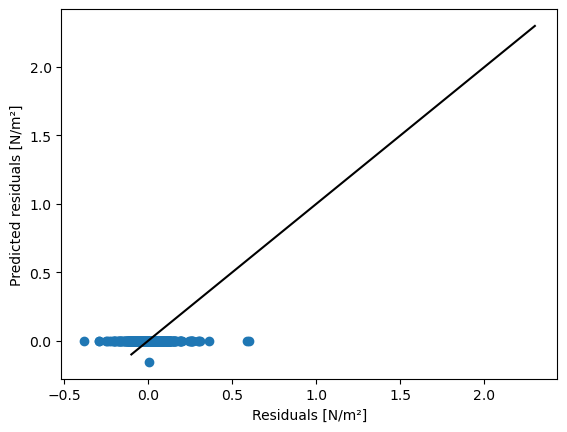

In [68]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

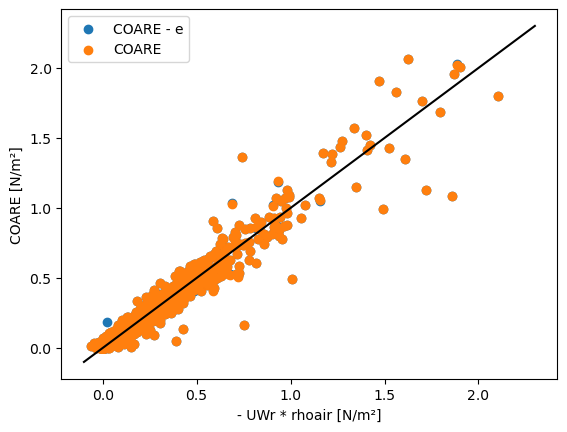

In [69]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [70]:
rmse(y_test.values, y_test_pred)

0.05142738411214034

In [71]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.05638345083654753

In [72]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [73]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.01057918],
       [0.01057918, 1.        ]])

In [74]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97374157],
       [0.97374157, 1.        ]])

In [75]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [76]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [77]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [78]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.0741 - mean_absolute_error: 0.7476 - val_loss: 0.1524 - val_mean_absolute_error: 0.2806
Epoch 2/500
179/179 [==============================] - 0s 882us/step - loss: 0.1804 - mean_absolute_error: 0.2912 - val_loss: 0.0175 - val_mean_absolute_error: 0.0911
Epoch 3/500
179/179 [==============================] - 0s 827us/step - loss: 0.0720 - mean_absolute_error: 0.2072 - val_loss: 0.0072 - val_mean_absolute_error: 0.0612
Epoch 4/500
179/179 [==============================] - 0s 838us/step - loss: 0.0370 - mean_absolute_error: 0.1488 - val_loss: 0.0049 - val_mean_absolute_error: 0.0461
Epoch 5/500
179/179 [==============================] - 0s 836us/step - loss: 0.0186 - mean_absolute_error: 0.1061 - val_loss: 0.0040 - val_mean_absolute_error: 0.0369
Epoch 6/500
179/179 [==============================] - 0s 811us/step - loss: 0.0105 - mean_absolute_error: 0.0783 - val_loss: 0.0034 - val_mean_absolute_error: 0.0321


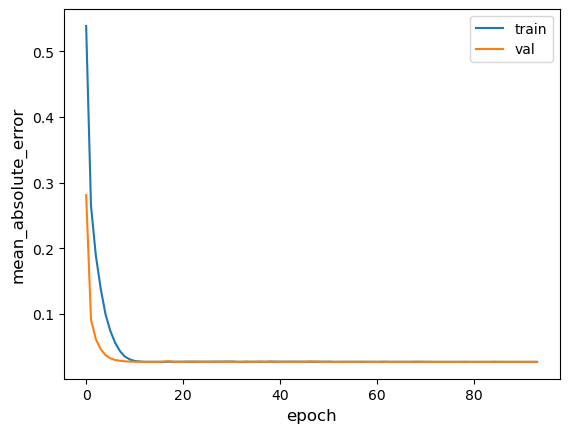

64/64 [==============================] - 0s 378us/step - loss: 0.0026 - mean_absolute_error: 0.0275
Test accuracy 0.027518322691321373
Test loss 0.002626476576551795


In [79]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [80]:
y_test_pred = multi_dense_model.predict(x_test)

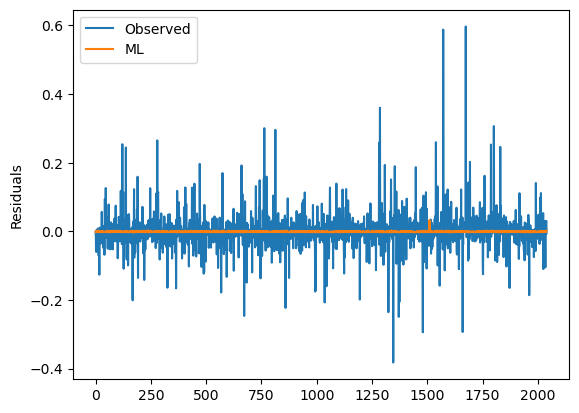

In [81]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

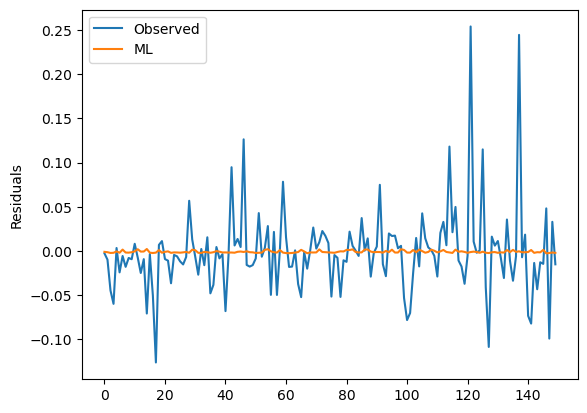

In [82]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

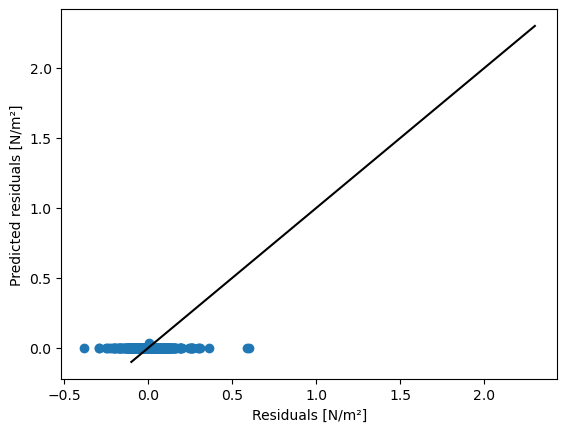

In [83]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

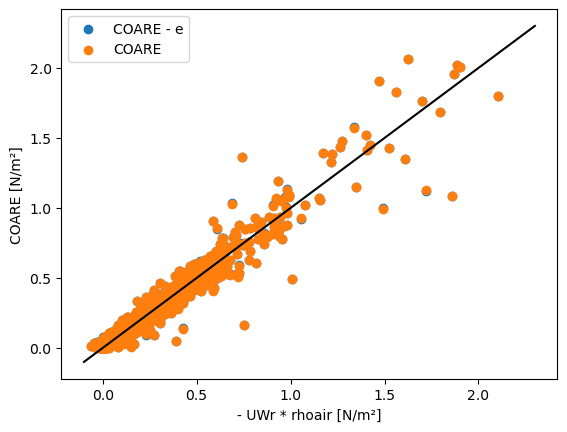

In [84]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [85]:
rmse(y_test.values, y_test_pred)

0.0513277831063004

In [86]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.05631994899862056

In [87]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [88]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.05307762],
       [0.05307762, 1.        ]])

In [89]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97382358],
       [0.97382358, 1.        ]])

In [90]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [91]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [92]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [93]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 13ms/step - loss: 3.2435 - mean_absolute_error: 1.0215 - val_loss: 0.1132 - val_mean_absolute_error: 0.2619
Epoch 2/500
179/179 [==============================] - 2s 12ms/step - loss: 0.3931 - mean_absolute_error: 0.4864 - val_loss: 0.0966 - val_mean_absolute_error: 0.2533
Epoch 3/500
179/179 [==============================] - 2s 12ms/step - loss: 0.2809 - mean_absolute_error: 0.4096 - val_loss: 0.0211 - val_mean_absolute_error: 0.1147
Epoch 4/500
179/179 [==============================] - 2s 12ms/step - loss: 0.1909 - mean_absolute_error: 0.3387 - val_loss: 0.0537 - val_mean_absolute_error: 0.1736
Epoch 5/500
179/179 [==============================] - 2s 12ms/step - loss: 0.1332 - mean_absolute_error: 0.2849 - val_loss: 0.0257 - val_mean_absolute_error: 0.0817
Epoch 6/500
179/179 [==============================] - 2s 12ms/step - loss: 0.0794 - mean_absolute_error: 0.2192 - val_loss: 0.0142 - val_mean_absolute_error: 0.0378
Epoc

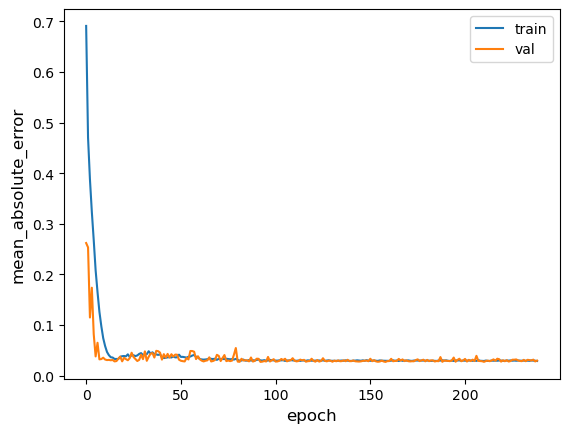

64/64 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_absolute_error: 0.0299
Test accuracy 0.029872259125113487
Test loss 0.0029317233711481094


In [94]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [95]:
y_test_pred = multi_dense_model.predict(x_test)

In [96]:
rmse(y_test.values, y_test_pred)

0.05619726217706093

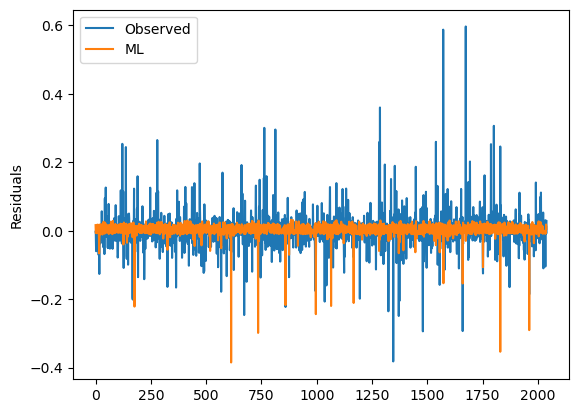

In [97]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

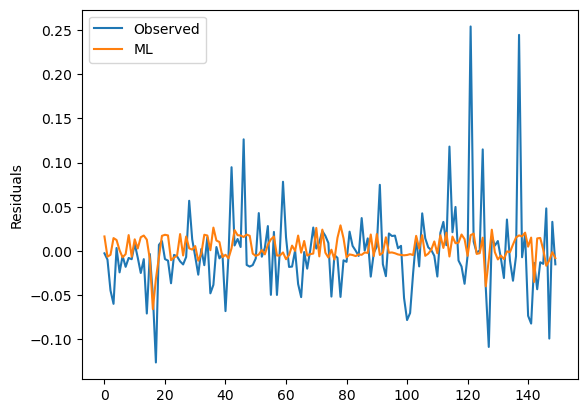

In [98]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

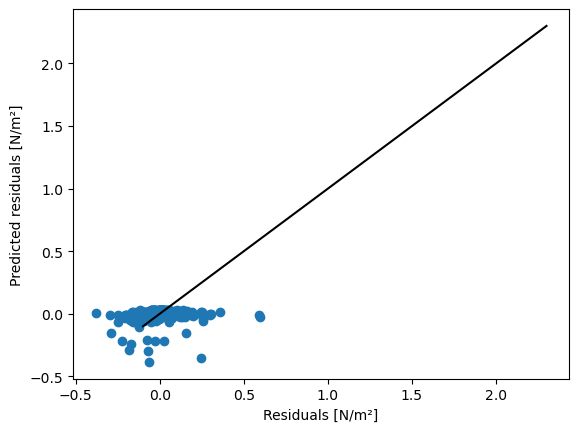

In [99]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

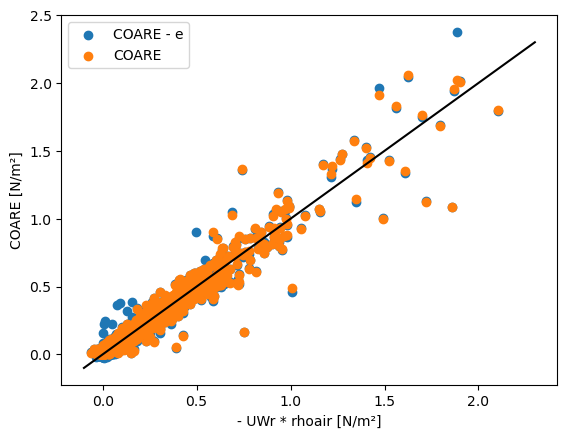

In [100]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [101]:
rmse(y_test.values, y_test_pred)

0.05619726217706093

In [102]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.06086425810442562

In [103]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [104]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.0965163],
       [0.0965163, 1.       ]])

In [105]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.96978507],
       [0.96978507, 1.        ]])

In [106]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [122]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [123]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [124]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 204ms/step - loss: 15.8603 - mean_absolute_error: 2.5701 - val_loss: 155.9316 - val_mean_absolute_error: 11.0686
Epoch 2/500
6/6 [==============================] - 1s 101ms/step - loss: 1.4090 - mean_absolute_error: 0.8674 - val_loss: 999.3157 - val_mean_absolute_error: 28.9230
Epoch 3/500
6/6 [==============================] - 1s 103ms/step - loss: 1.1846 - mean_absolute_error: 0.7793 - val_loss: 445.3987 - val_mean_absolute_error: 19.5532
Epoch 4/500
6/6 [==============================] - 1s 104ms/step - loss: 0.7522 - mean_absolute_error: 0.6860 - val_loss: 138.3570 - val_mean_absolute_error: 9.2008
Epoch 5/500
6/6 [==============================] - 1s 101ms/step - loss: 0.6969 - mean_absolute_error: 0.6538 - val_loss: 63.4838 - val_mean_absolute_error: 5.8226
Epoch 6/500
6/6 [==============================] - 1s 102ms/step - loss: 0.6286 - mean_absolute_error: 0.6128 - val_loss: 28.1402 - val_mean_absolute_error: 4.5262
Epoch 7/

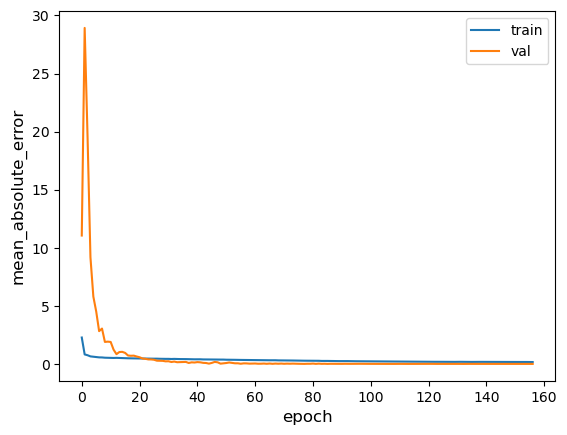

64/64 [==============================] - 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0287
Test accuracy 0.028730861842632294
Test loss 0.0026895315386354923


In [125]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [126]:
y_test_pred = multi_dense_model.predict(x_test)

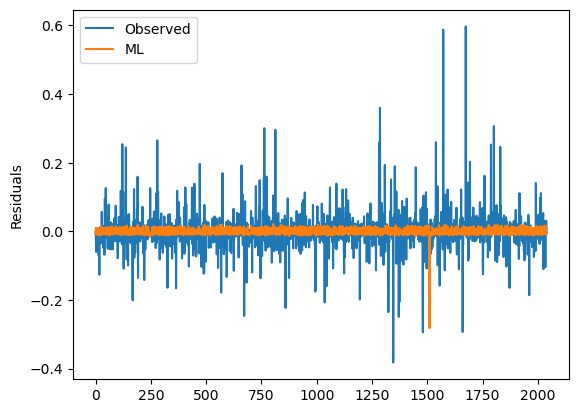

In [127]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

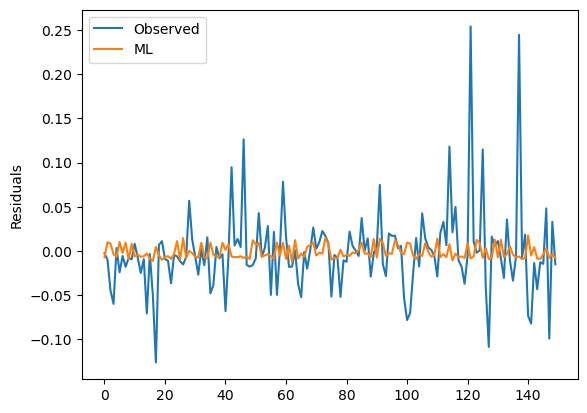

In [128]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

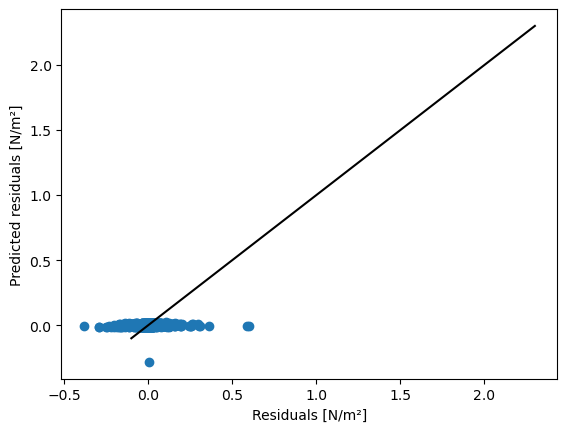

In [129]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

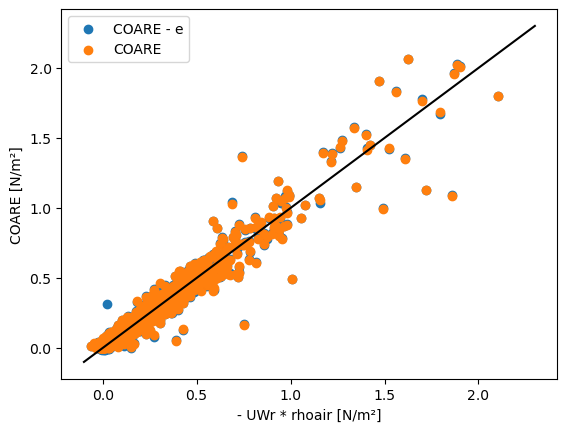

In [130]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [131]:
rmse(y_test.values, y_test_pred)

0.05230103166243116

In [132]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.05735591001365662

In [133]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [134]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.04402366],
       [0.04402366, 1.        ]])

In [135]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97288503],
       [0.97288503, 1.        ]])

In [136]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])